# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:
dr = pd.date_range("1/1/2018 00:00:00", "1/1/2018 00:29:10", periods=1751)

Assign the time series index to the dataframe's index.

In [7]:
# Your code here:
df = sensor.set_index(dr)
df.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

/home/jmpchamizo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


Figure(432x288)


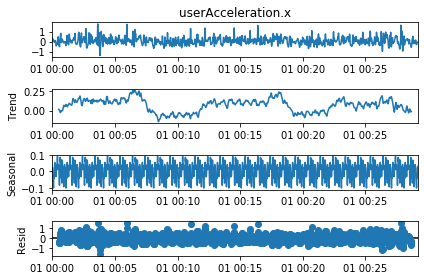

In [8]:
# Your code here:
data = df["userAcceleration.x"][dr]
res = sm.tsa.seasonal_decompose(data, freq=60)
print(res.plot())

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

/home/jmpchamizo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


Figure(432x288)


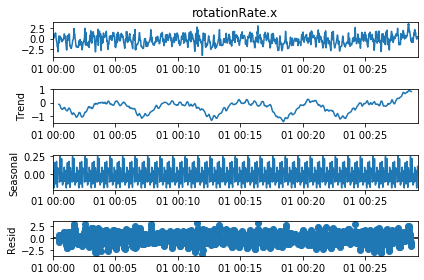

In [9]:
data = df["rotationRate.x"][dr]
res = sm.tsa.seasonal_decompose(data, freq=60)
print(res.plot())

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

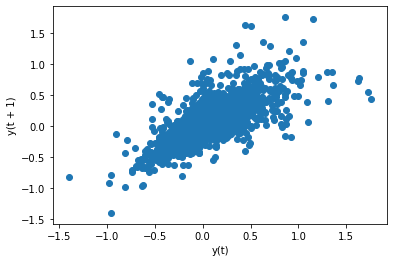

In [10]:
# Your code here:
import matplotlib.pyplot as plt
pd.plotting.lag_plot(df["userAcceleration.x"])

Create a lag plot for `rotationRate.x`

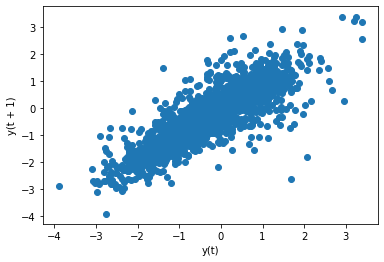

In [11]:
# Your code here:
pd.plotting.lag_plot(df["rotationRate.x"])

What are your conclusions from both visualizations?

In [12]:
# Your conclusions here:
# Según parece en las gráficas que obtenemos parece que va a existir una dependencia temporal con los datos obtenidos.
# A pesar de que se ve mucha dispersión en los datos.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [13]:
from statsmodels.tsa.stattools import adfuller

stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"
print("userAcceleration:", stationaryCheck(df['userAcceleration.x']))
print("rotation:", stationaryCheck(df['rotationRate.x']))

userAcceleration: Stationary
rotation: Stationary


What are your conclusions from this test?

In [14]:
# Your conclusions here:
# A pesar de que en las gráficas si que parece que hay una depedencia temporal en lo datos las conclusiones
# que sacamos con la Prueba de Dickey-Fuller es que esa dependencia no existe y es estacionaria.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [15]:
# Your code here:
from statsmodels.tsa.arima_model import ARMA
train, test = df["userAcceleration.x"][:-10], df["userAcceleration.x"][-10:]
model = ARMA(train, order=(2,1))
model_fit = model.fit(disp=False)
predictions_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df["userAcceleration.x"][-10:], predictions_ARMA)
rmse = np.sqrt(mse)
rmse

0.22529863653820809

## Rehacemos el ejercicio pero ahora intentaremos limipiar la señal de las frecuencias no deseadas

In [17]:
#Vamos a limpiar los datos a ver si obtenemos los mismos resultados.

In [18]:
from scipy import signal

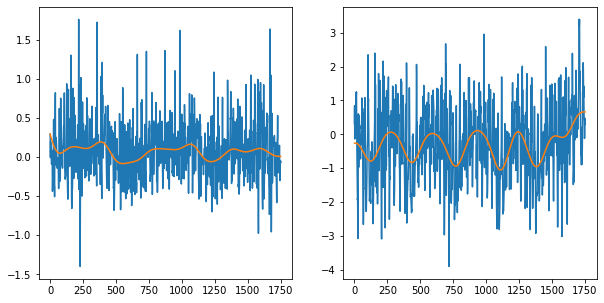

In [19]:
b, a = signal.butter(3, 1/100)
data_acceleration_filtered = signal.filtfilt(b, a, df["userAcceleration.x"])
data_rotation_filtered = signal.filtfilt(b, a, df["rotationRate.x"])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df["userAcceleration.x"].to_numpy())
plt.plot(data_acceleration_filtered)
plt.subplot(1,2,2)
plt.plot(df["rotationRate.x"].to_numpy())
plt.plot(data_rotation_filtered)

In [20]:
#En el caso del sensor de rotación en el eje x se ve una clara dependencia temporal no tan clara para el acelerometro

/home/jmpchamizo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


Figure(432x288)


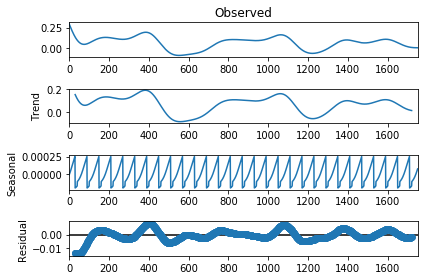

In [21]:
res = sm.tsa.seasonal_decompose(data_acceleration_filtered, freq=60)
print(res.plot())

/home/jmpchamizo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


Figure(432x288)


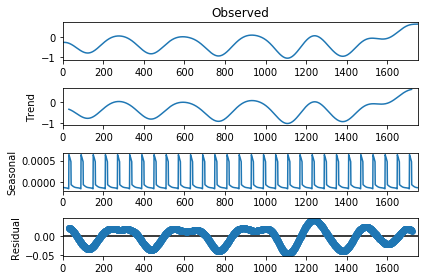

In [22]:
res = sm.tsa.seasonal_decompose(data_rotation_filtered, freq=60)
print(res.plot())

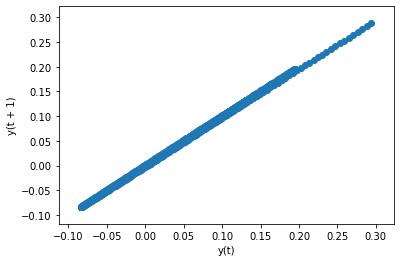

In [23]:
df_acceleration = pd.DataFrame(data_acceleration_filtered, index=dr)
pd.plotting.lag_plot(df_acceleration)

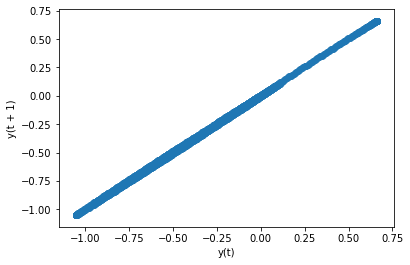

In [24]:
df_rotation = pd.DataFrame(data_rotation_filtered, index=dr)
pd.plotting.lag_plot(df_rotation)

In [25]:
stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"
print("userAcceleration:", stationaryCheck(data_acceleration_filtered))
print("rotation:", stationaryCheck(data_rotation_filtered))

userAcceleration: Stationary
rotation: Not-Stationary


In [26]:
# En el caso de la señal de rotación se ve claramente su comportamiento no estacionario y ahora la
# prueba de Dickey-Fuller nos de el resultado de no estacionario.
# En el caso del acelerómetro a pesar de que el gráfico de y(t) frente y(t+1) parece indicar una dependencia
# temporal, está no es corroborada por DF.

In [27]:
train, test = df_acceleration[:-10], df_acceleration[-10:]
model = ARMA(train, order=(1,0))
model_fit = model.fit(disp=False)
predictions_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


In [28]:
mse = mean_squared_error(df_acceleration[-10:], predictions_ARMA)
rmse = np.sqrt(mse)
rmse

0.0002675559168736372

In [29]:
#Mejorarmos el error en las predicciones